### Importing Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

### Loading Data and Data Preprocessing

In [ ]:
train_path = '/content/Dataset/Train'
valid_path = '/content/Dataset/Validation'
test_path = '/content/Dataset/Test'

target_size = (224, 224)
classes = ['with_mask', 'without_mask']
batch_size = 16

#Data Augmentation
train_batches = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   zoom_range=0.2, fill_mode='nearest', horizontal_flip=True) \
    .flow_from_directory(directory=train_path, target_size=target_size, classes=classes, batch_size=batch_size)

valid_batches = ImageDataGenerator(rescale = 1./255) \
    .flow_from_directory(directory=valid_path, target_size=target_size, classes=classes, batch_size=batch_size, 
                         shuffle=False)

test_batches = ImageDataGenerator(rescale = 1./255) \
    .flow_from_directory(directory=test_path, target_size=target_size, classes=classes, batch_size=batch_size, 
                         shuffle=False)

Found 4200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


### Model Architecture

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dropout(0.4),
    Dense(units=256, activation='relu'), 
    Dense(units=2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=3e-5), loss="binary_crossentropy", metrics=["accuracy"]) 

### Training the Network

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x=train_batches, validation_data=valid_batches, epochs=50, callbacks=[early_stopping])

Epoch 1/50
263/263 [==============================] - 55s 206ms/step - loss: 0.3761 - accuracy: 0.8433 - val_loss: 0.1771 - val_accuracy: 0.9458
Epoch 2/50
263/263 [==============================] - 53s 200ms/step - loss: 0.2329 - accuracy: 0.9110 - val_loss: 0.1338 - val_accuracy: 0.9567
Epoch 3/50
263/263 [==============================] - 52s 198ms/step - loss: 0.2103 - accuracy: 0.9217 - val_loss: 0.1194 - val_accuracy: 0.9633
Epoch 4/50
263/263 [==============================] - 52s 198ms/step - loss: 0.1790 - accuracy: 0.9336 - val_loss: 0.1159 - val_accuracy: 0.9567
Epoch 5/50
263/263 [==============================] - 52s 195ms/step - loss: 0.1721 - accuracy: 0.9352 - val_loss: 0.1014 - val_accuracy: 0.9633
Epoch 6/50
263/263 [==============================] - 52s 196ms/step - loss: 0.1782 - accuracy: 0.9333 - val_loss: 0.1011 - val_accuracy: 0.9592
Epoch 7/50
263/263 [==============================] - 52s 196ms/step - loss: 0.1757 - accuracy: 0.9352 - val_loss: 0.0900 - val_ac

In [ ]:
# Save the model
model.save('model.h5')

### Testing the Accuracy of the Model

/content/Dataset/Test/with_mask/*
with_mask


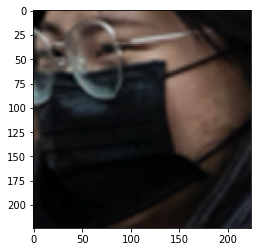

In [ ]:
from random import choice
#Testing data with Test set
loaded_model = tf.keras.models.load_model('model.h5')
classes = ['with_mask', 'without_mask']
path = f"/content/Dataset/Test/{choice(classes)}/*"
print(path)
random_dir = choice(glob.glob(path))
img = cv2.imread(random_dir)
img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape(1, 224, 224, 3)
pred = loaded_model.predict(img)
print(classes[np.argmax(pred[0])])
plt.imshow(img.reshape(224, 224, 3))
plt.show()

In [ ]:
#Implenting a Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
confusion_matrix = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
confusion_matrix

array([[297,   3],
       [  4, 296]])

### Visualizing the Results



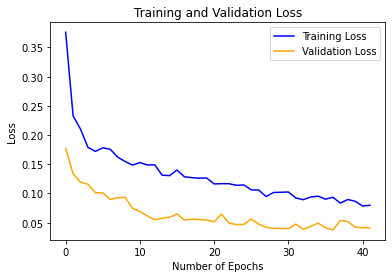

In [ ]:
# Plot the Loss
plt.plot(history.history['loss'], 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], 'orange', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

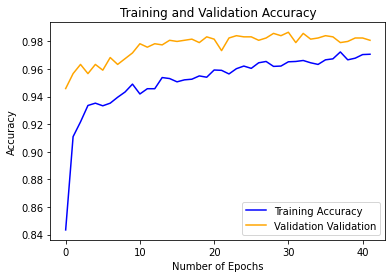

In [ ]:
#Plot the Accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], 'orange', label = 'Validation Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()